# Metrics


## Regression


### RMSEとMAE

どっちがいいか？という議論があるらしい

[Chai, T., & Draxler, R. R. (2014). Root mean square error (RMSE) or mean absolute error (MAE)?–Arguments against avoiding RMSE in the literature. Geoscientific model development, 7(3), 1247-1250.](https://gmd.copernicus.org/articles/7/1247/2014/gmd-7-1247-2014.pdf)

## Classification

#### Recall

再現率（recall）：実際にPositiveであるデータのうち正しく予測できたものの割合、どれだけFalse Negativeを小さくできたか

$$
Recall = \frac{TP}{TP+FN}
$$

#### Precision

適合率（precision）：予測したPositiveにおいて正しく予測できたものの割合、どれだけFalse Positiveを小さくできたか

$$
Precision = \frac{TP}{TP+FP}
$$

#### F1-score

PrecisionとRecallにはトレードオフ関係がある（https://datawokagaku.com/f1score/ ）ため、調和平均をとったF1-scoreというものもある

$$
F1 = \frac{2}{\frac{1}{Recall} + \frac{1}{Precision}}
= 2 \frac{Recall \times Precision}{Recall + Precision}
$$


#### ROC曲線

true positive rate $TPR$（recallの別名、陽性者を正しく陽性だと当てる率、sensitivityとも）とfalse positive rate $FPR$（陰性者のうち偽陽性になる率）

$$
TPR = \frac{TP}{P} = \frac{TP}{TP + FN} =
\frac{\text{Positiveを当てたもの}}{\text{Positiveのもの}}\\
FPR = \frac{FP}{N} = \frac{FP}{FN + TN} =
\frac{\text{Positiveを外したもの}}{\text{Negativeのもの}}
$$

を用いて閾値を変えながら描いた曲線をreceiver operating characteristic（ROC; 受信者操作特性）曲線という。

ROC曲線の下側の面積（Area Under the Curve）を**ROC-AUC**という。ランダムなアルゴリズム（chance level）だとROC-AUCは0.5になる

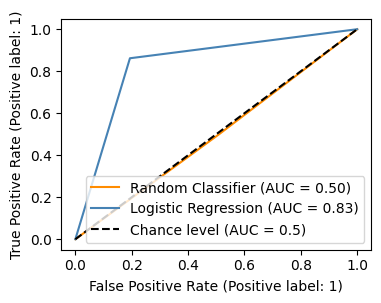

In [36]:
from sklearn.datasets import make_classification
size = 1000
X, y = make_classification(n_samples=size, n_features=2, n_informative=1, n_redundant=1,
                           class_sep=0.5, n_classes=2, n_clusters_per_class=1, random_state=0)

# ランダムなアルゴリズム
import numpy as np
np.random.seed(1)
random = np.random.binomial(n=1, p=0.5, size=size)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)
y_pred = clf.predict(X)

# plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[4, 3])

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(
    y,
    random,
    name="Random Classifier",
    color="darkorange",
    ax=ax
)
RocCurveDisplay.from_predictions(
    y,
    y_pred,
    name="Logistic Regression",
    color="steelblue",
    plot_chance_level=True,
    ax=ax
)
fig.show()

#### Precision-Recall Curve

さまざまなthresholdの元でのRecallとPrecisionを算出し、横軸にRecall、縦軸にPrecisionを結んだグラフ

PR曲線の下側の面積（Area Under the Curve）をPR-AUCあるいはAverage Precisionという

$$
AP = \sum^K_{k=1} (R_k - R_{k-1}) P_k
$$

ROC曲線とは異なり、「ランダムなアルゴリズムなら0.5」のような安定したスケールではなく、スケールはクラスのバランス（不均衡具合）に依存する

その分、不均衡データにおけるモデル評価に向いていると言われている


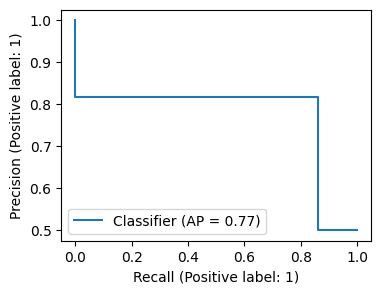

In [79]:
from sklearn.datasets import make_classification
size = 1000
X, y = make_classification(n_samples=size, n_features=2, n_informative=1, n_redundant=1,
                           class_sep=0.5, n_classes=2, n_clusters_per_class=1, random_state=0)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)
y_pred = clf.predict(X)

# plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[4, 3])

from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y, y_pred, ax=ax)
fig.show()

### imbalanced dataとPR曲線・ROC曲線



ある不均衡データがあったとする

In [73]:
from sklearn.datasets import make_classification
size = 1000
X, y = make_classification(n_samples=size, n_features=2, n_informative=1, n_redundant=1, weights=[0.95, 0.05],
                           class_sep=0.5, n_classes=2, n_clusters_per_class=1, random_state=0)

import pandas as pd
pd.Series(y).value_counts()

0    943
1     57
Name: count, dtype: int64

In [74]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)
y_pred = clf.predict(X)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
for metrics in "accuracy_score, recall_score, precision_score, f1_score".split(", "):
    value = eval(f"{metrics}(y, y_pred)")
    print(f"{metrics}={value:.2}")

accuracy_score=0.94
recall_score=0.053
precision_score=0.43
f1_score=0.094


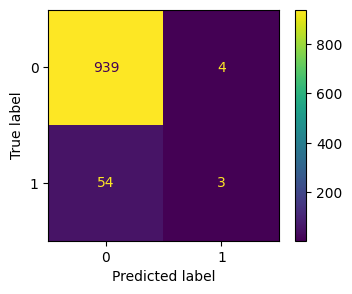

In [75]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[4, 3])
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y, y_pred, ax=ax)

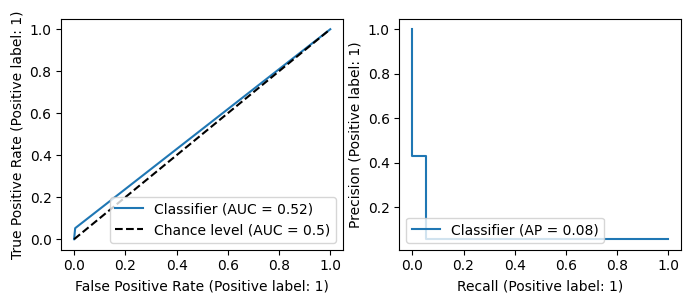

In [76]:
# plot
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=[8, 3], ncols=2)

from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
RocCurveDisplay.from_predictions(y, y_pred, plot_chance_level=True, ax=axes[0])
PrecisionRecallDisplay.from_predictions(y, y_pred, ax=axes[1])
fig.show()

## コサイン類似度

ベクトルの方向が似ているものは似ている


[コサイン類似度（Cosine Similarity）とは？：AI・機械学習の用語辞典 - ＠IT](https://atmarkit.itmedia.co.jp/ait/articles/2112/08/news020.html)


2つのベクトルがなす角（コサイン）の値が類似度として使える、ということになる

$$
\newcommand{\b}[1]{\boldsymbol{#1}}
\b{a} \cdot \b{b} = ||\b{a}|| \ ||\b{b}|| \cos(\b{a}, \b{b})
\\
\implies \cos(\b{a}, \b{b}) = \frac{ \b{a} \cdot \b{b} }{ ||\b{a}|| \ ||\b{b}|| }
$$



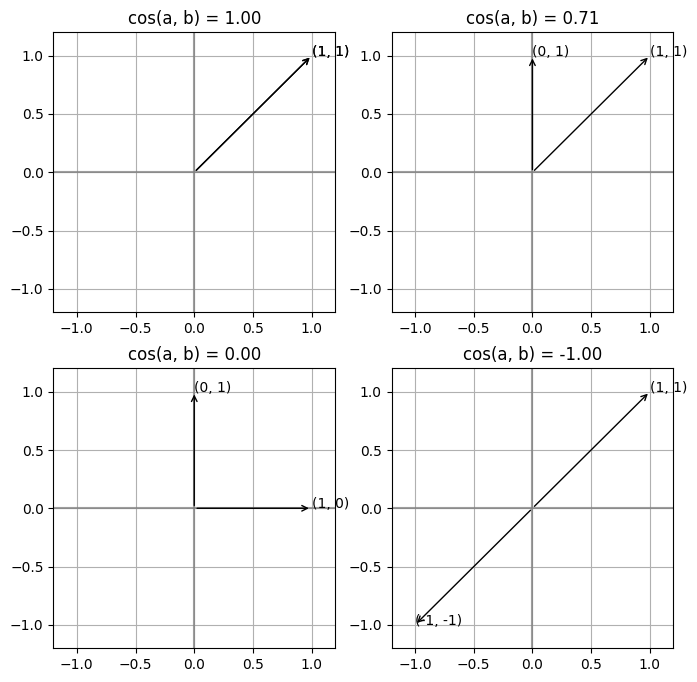

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def cos(a, b):
    e = 1e-8
    return a @ b / (np.linalg.norm(a + e) * np.linalg.norm(b + e))

def plot(ax, a, b):
    for x in [a, b]:
        ax.axhline(color="gray", alpha=.5)
        ax.axvline(color="gray", alpha=.5)
        ax.text(x[0], x[1], f"{x[0], x[1]}", color="black")
        ax.annotate("", xy=(x[0], x[1]), xytext=(0, 0),
                    arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
        ax.set(title=f"cos(a, b) = {cos(a, b):.2f}", xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))
        ax.grid(True)
    return ax


data = [
    [
        [
            np.array([1, 1]),
            np.array([1, 1])
        ],
        [
            np.array([0, 1]),
            np.array([1, 1])
        ],
    ],
    [
        [
            np.array([1, 0]),
            np.array([0, 1])
        ],
        [
            np.array([1, 1]),
            np.array([-1, -1])
        ],
    ]
]

fig, axes = plt.subplots(figsize=(8, 8), nrows=2, ncols=2)
for i in range(2):
    for j in range(2):
        a, b = data[i][j]
        plot(axes[i, j], a, b)
fig.show()

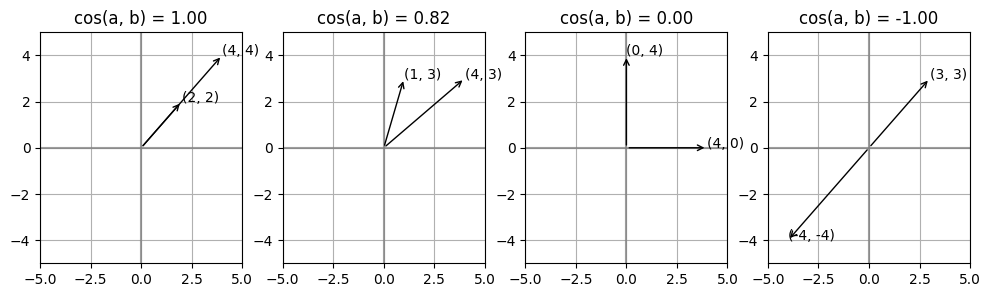

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def cos(a, b):
    e = 1e-8
    return a @ b / (np.linalg.norm(a + e) * np.linalg.norm(b + e))

def plot(ax, a, b):
    for x in [a, b]:
        ax.axhline(color="gray", alpha=.5)
        ax.axvline(color="gray", alpha=.5)
        ax.text(x[0], x[1], f"{x[0], x[1]}", color="black")
        ax.annotate("", xy=(x[0], x[1]), xytext=(0, 0),
                    arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
        ax.set(title=f"cos(a, b) = {cos(a, b):.2f}", xlim=(-5, 5), ylim=(-5, 5))
        ax.grid(True)
    return ax


data = [
    [
        np.array([4, 4]),
        np.array([2, 2])
    ],
    [
        np.array([1, 3]),
        np.array([4, 3])
    ],
    [
        np.array([4, 0]),
        np.array([0, 4])
    ],
    [
        np.array([3, 3]),
        np.array([-4, -4])
    ]
]

fig, axes = plt.subplots(figsize=(12, 3), ncols=4)
for i in range(4):
    a, b = data[i]
    plot(axes[i], a, b)
fig.show()